In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Multiply, Reshape, Activation, Flatten

# Data Preparation For the Convolutional Neural Network

In [140]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
9711,1,642.12,1582.50,1400.44,553.76,2388.05,47.31,521.97,2388.08,8.4366,394,38.96,23.3947,197
9712,2,642.62,1589.90,1404.14,554.52,2388.02,47.31,522.27,2388.02,8.4211,394,38.91,23.4594,196
9713,3,642.55,1582.75,1403.42,554.26,2388.04,47.41,522.40,2388.04,8.3931,392,38.97,23.3230,195
9714,4,642.61,1586.91,1403.46,554.56,2388.05,47.46,522.25,2388.08,8.4286,393,38.91,23.3886,194
9715,5,642.41,1589.70,1401.43,554.26,2388.05,47.33,522.10,2388.00,8.4295,394,38.98,23.3340,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,194,643.77,1604.93,1423.51,551.41,2388.18,48.16,519.85,2388.19,8.5043,396,38.42,23.0543,4
9905,195,643.33,1605.31,1434.87,551.25,2388.17,48.14,519.33,2388.21,8.5352,395,38.45,23.0191,3
9906,196,643.32,1602.26,1430.01,551.40,2388.19,48.24,519.88,2388.17,8.5034,395,38.45,23.0379,2
9907,197,643.73,1599.94,1432.87,551.18,2388.19,48.22,519.48,2388.20,8.5241,397,38.52,23.0832,1


In [141]:
################################## Scalling the DATA
scaler=MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape of df for engine {}: '.format(engine_id),df.shape)
df

Shape of df for engine 50:  (198, 14)


array([[0.        , 0.14222222, 0.19258561, ..., 0.78571429, 0.82617801,
        1.        ],
       [0.00507614, 0.36444444, 0.42507069, ..., 0.72619048, 0.96167539,
        0.99492386],
       [0.01015228, 0.33333333, 0.20043984, ..., 0.79761905, 0.67602094,
        0.98984772],
       ...,
       [0.98984772, 0.67555556, 0.8133836 , ..., 0.17857143, 0.07895288,
        0.01015228],
       [0.99492386, 0.85777778, 0.74049639, ..., 0.26190476, 0.17382199,
        0.00507614],
       [1.        , 0.90222222, 1.        , ..., 0.1547619 , 0.22701571,
        0.        ]])

In [142]:
################################    Getting into training shape with slidingwindow
features = df[:,0:-1]
target = df[:,-1]

target

array([1.        , 0.99492386, 0.98984772, 0.98477157, 0.97969543,
       0.97461929, 0.96954315, 0.96446701, 0.95939086, 0.95431472,
       0.94923858, 0.94416244, 0.93908629, 0.93401015, 0.92893401,
       0.92385787, 0.91878173, 0.91370558, 0.90862944, 0.9035533 ,
       0.89847716, 0.89340102, 0.88832487, 0.88324873, 0.87817259,
       0.87309645, 0.8680203 , 0.86294416, 0.85786802, 0.85279188,
       0.84771574, 0.84263959, 0.83756345, 0.83248731, 0.82741117,
       0.82233503, 0.81725888, 0.81218274, 0.8071066 , 0.80203046,
       0.79695431, 0.79187817, 0.78680203, 0.78172589, 0.77664975,
       0.7715736 , 0.76649746, 0.76142132, 0.75634518, 0.75126904,
       0.74619289, 0.74111675, 0.73604061, 0.73096447, 0.72588832,
       0.72081218, 0.71573604, 0.7106599 , 0.70558376, 0.70050761,
       0.69543147, 0.69035533, 0.68527919, 0.68020305, 0.6751269 ,
       0.67005076, 0.66497462, 0.65989848, 0.65482234, 0.64974619,
       0.64467005, 0.63959391, 0.63451777, 0.62944162, 0.62436

In [143]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

In [144]:
ts_generator[0]

(array([[[0.        , 0.14222222, 0.19258561, 0.1151375 , 0.68617021,
          0.26086957, 0.16216216, 0.84615385, 0.39285714, 0.4085183 ,
          0.57142857, 0.78571429, 0.82617801],
         [0.00507614, 0.36444444, 0.42507069, 0.21022873, 0.88829787,
          0.13043478, 0.16216216, 0.94230769, 0.17857143, 0.31553689,
          0.57142857, 0.72619048, 0.96167539],
         [0.01015228, 0.33333333, 0.20043984, 0.19172449, 0.81914894,
          0.2173913 , 0.25225225, 0.98397436, 0.25      , 0.14757049,
          0.28571429, 0.79761905, 0.67602094],
         [0.01522843, 0.36      , 0.33113415, 0.19275251, 0.89893617,
          0.26086957, 0.2972973 , 0.93589744, 0.39285714, 0.36052789,
          0.42857143, 0.72619048, 0.81340314],
         [0.02030457, 0.27111111, 0.41878731, 0.14058083, 0.81914894,
          0.26086957, 0.18018018, 0.88782051, 0.10714286, 0.36592681,
          0.57142857, 0.80952381, 0.69905759],
         [0.02538071, 0.29333333, 0.28180961, 0.16628116, 0.65159

In [145]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.         0.14222222 0.19258561 0.1151375  0.68617021 0.26086957
   0.16216216 0.84615385 0.39285714 0.4085183  0.57142857 0.78571429
   0.82617801]
  [0.00507614 0.36444444 0.42507069 0.21022873 0.88829787 0.13043478
   0.16216216 0.94230769 0.17857143 0.31553689 0.57142857 0.72619048
   0.96167539]
  [0.01015228 0.33333333 0.20043984 0.19172449 0.81914894 0.2173913
   0.25225225 0.98397436 0.25       0.14757049 0.28571429 0.79761905
   0.67602094]
  [0.01522843 0.36       0.33113415 0.19275251 0.89893617 0.26086957
   0.2972973  0.93589744 0.39285714 0.36052789 0.42857143 0.72619048
   0.81340314]
  [0.02030457 0.27111111 0.41878731 0.14058083 0.81914894 0.26086957
   0.18018018 0.88782051 0.10714286 0.36592681 0.57142857 0.80952381
   0.69905759]
  [0.02538071 0.29333333 0.28180961 0.16628116 0.65159574 0.08695652
   0.31531532 0.71474359 0.         0.23275345 0.14285714 0.67857143
   0.62513089]
  [0.03045685 0.25333333 0.26390198 0.16396

In [146]:
X=[]
y=[]

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

[array([[[0.        ],
        [0.14222222],
        [0.19258561],
        [0.1151375 ],
        [0.68617021],
        [0.26086957],
        [0.16216216],
        [0.84615385],
        [0.39285714],
        [0.4085183 ],
        [0.57142857],
        [0.78571429],
        [0.82617801]],

       [[0.00507614],
        [0.36444444],
        [0.42507069],
        [0.21022873],
        [0.88829787],
        [0.13043478],
        [0.16216216],
        [0.94230769],
        [0.17857143],
        [0.31553689],
        [0.57142857],
        [0.72619048],
        [0.96167539]],

       [[0.01015228],
        [0.33333333],
        [0.20043984],
        [0.19172449],
        [0.81914894],
        [0.2173913 ],
        [0.25225225],
        [0.98397436],
        [0.25      ],
        [0.14757049],
        [0.28571429],
        [0.79761905],
        [0.67602094]],

       [[0.01522843],
        [0.36      ],
        [0.33113415],
        [0.19275251],
        [0.89893617],
        [0.26086957],
   

In [147]:
def Data_format_conversion(Train_no,engine_id):    
    
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])

    ################################## Scalling the DATA
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    ################################    Getting into training shape with slidingwindow
    features = df[:,0:-1]
    target = df[:,-1]



    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    ################################ Changing the shape of input to (no of smaples,window_length,features)
    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        # X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        X.append(x_temp.squeeze(0))  # Shape becomes (win_length, feature_num)
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

In [148]:
import tensorflow as tf
tf.keras.backend.clear_session()  # Reset graph

# Training the CNN Model

In [149]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

# model=Sequential()
# # CNN
# model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
# model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(1, activation='linear'))

# New input shape for Conv1D (no need for 2D convs for time series)
input_layer = Input(shape=(win_length, feature_num))
x = Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = Conv1D(32, 3, activation='relu', padding='same')(x)

# Temporal attention mechanism
attention = Dense(1, activation='linear')(x)  # Shape: (25, 1)
attention = Flatten()(attention)  # Shape: (25,)
attention = Activation('softmax')(attention)  # Apply softmax across time steps
attention = Reshape((win_length, 1))(attention)  # Shape: (25, 1)

# Apply attention weights
weighted = Multiply()([x, attention])  # (25, 32) * (25, 1) → (25, 32)

# Pooling and output
x = GlobalMaxPooling1D()(weighted)  # Shape: (32,)
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)


# model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

def asymmetric_mse(y_true, y_pred):
    import tensorflow as tf
    error = y_true - y_pred
    # Penalize late predictions (underpredictions) 10x more
    weight = tf.where(error > 0, 10.0, 1.0)  # y_true > y_pred means dangerous late prediction
    return tf.reduce_mean(weight * tf.square(error))

model.compile(optimizer='adam', loss=asymmetric_mse, metrics=['mse'])
#model.summary()

In [150]:

###############################  Fitting the training data with CNN
# Train_no=1
# for engine_no in range(1,50):    
#     X,y,scaler,features=Data_format_conversion(Train_no,engine_no) 
    
#     model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

def build_full_dataset(Train_no):
    all_X = []
    all_y = []
    for engine_id in range(1, 100):  # Adjust based on CMAPSS FD001 (100 engines)
        X, y, _, _ = Data_format_conversion(Train_no, engine_id)
        all_X.append(X)
        all_y.append(y)
    return np.vstack(all_X), np.vstack(all_y)

X_train, y_train = build_full_dataset(1)
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Shape of df for engine 1:  (192, 14)
Shape of df for engine 2:  (287, 14)
Shape of df for engine 3:  (179, 14)
Shape of df for engine 4:  (189, 14)
Shape of df for engine 5:  (269, 14)
Shape of df for engine 6:  (188, 14)
Shape of df for engine 7:  (259, 14)
Shape of df for engine 8:  (150, 14)
Shape of df for engine 9:  (201, 14)
Shape of df for engine 10:  (222, 14)
Shape of df for engine 11:  (240, 14)
Shape of df for engine 12:  (170, 14)
Shape of df for engine 13:  (163, 14)
Shape of df for engine 14:  (180, 14)
Shape of df for engine 15:  (207, 14)
Shape of df for engine 16:  (209, 14)
Shape of df for engine 17:  (276, 14)
Shape of df for engine 18:  (195, 14)
Shape of df for engine 19:  (158, 14)
Shape of df for engine 20:  (234, 14)
Shape of df for engine 21:  (195, 14)
Shape of df for engine 22:  (202, 14)
Shape of df for engine 23:  (168, 14)
Shape of df for engine 24:  (147, 14)
Shape of df for engine 25:  (230, 14)
Shape of df for engine 26:  (199, 14)
Shape of df for engin

LookupError: gradient registry has no entry for: shap_Mean

# Predict on Training data

In [ ]:
Train_no=1
engine_id = 1
X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

Shape of df for engine 1:  (192, 14)


In [ ]:
X.shape

(167, 25, 13)

In [ ]:
prediction=model.predict(X) ######### prediction on trained data
np.shape(prediction)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(167, 1)

In [ ]:
len(features)

192

In [ ]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.130890,0.180,0.412356,0.063945,0.800469,0.21875,0.176923,0.825826,0.236842,0.374110,0.500,0.619048,0.842913,0.870226
1,0.136126,0.292,0.462284,0.212121,0.791080,0.06250,0.261538,0.741742,0.421053,0.235599,0.375,0.773810,0.902606,0.864377
2,0.141361,0.256,0.188218,0.142527,0.934272,0.37500,0.292308,0.912913,0.289474,0.414887,0.000,0.797619,0.601183,0.860015
3,0.146597,0.080,0.259698,0.190293,0.833333,0.15625,0.161538,0.864865,0.236842,0.328155,0.375,0.702381,0.740898,0.857740
4,0.151832,0.196,0.571839,0.064201,0.861502,0.21875,0.284615,0.798799,0.078947,0.247896,0.000,0.845238,0.835705,0.845297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.979058,0.816,0.890086,0.749872,0.291080,0.96875,0.746154,0.078078,0.684211,0.987055,0.750,0.202381,0.000000,0.025054
163,0.984293,0.988,0.667026,0.884181,0.000000,0.84375,0.807692,0.015015,0.947368,0.971521,0.625,0.166667,0.284421,0.021835
164,0.989529,0.772,0.776580,0.831279,0.138498,0.90625,1.000000,0.153153,1.000000,0.997411,1.000,0.178571,0.200887,0.013385
165,0.994764,0.652,0.889368,0.826656,0.051643,0.87500,0.861538,0.012012,0.868421,0.965696,0.500,0.130952,0.315468,0.011742


In [ ]:
rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,642.16,1589.08,1396.07,554.11,2388.07,47.26,522.28,2388.06,8.4260,394.0,38.86,23.4149,166.213080
1,27.0,642.44,1590.47,1401.84,554.07,2388.02,47.37,522.00,2388.13,8.4046,393.0,38.99,23.4472,165.096023
2,28.0,642.35,1582.84,1399.13,554.68,2388.12,47.41,522.57,2388.08,8.4323,390.0,39.01,23.2841,164.262917
3,29.0,641.91,1584.83,1400.99,554.25,2388.05,47.24,522.41,2388.06,8.4189,393.0,38.93,23.3597,163.828280
4,30.0,642.20,1593.52,1396.08,554.37,2388.07,47.40,522.19,2388.00,8.4065,390.0,39.05,23.4110,161.451632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,188.0,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396.0,38.51,22.9588,4.785244
163,189.0,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395.0,38.48,23.1127,4.170567
164,190.0,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398.0,38.49,23.0675,2.556629
165,191.0,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394.0,38.45,23.1295,2.242644


In [ ]:
    
df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns=['ID'])
df_actual

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396,38.51,22.9588,4
188,189,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395,38.48,23.1127,3
189,190,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398,38.49,23.0675,2
190,191,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394,38.45,23.1295,1


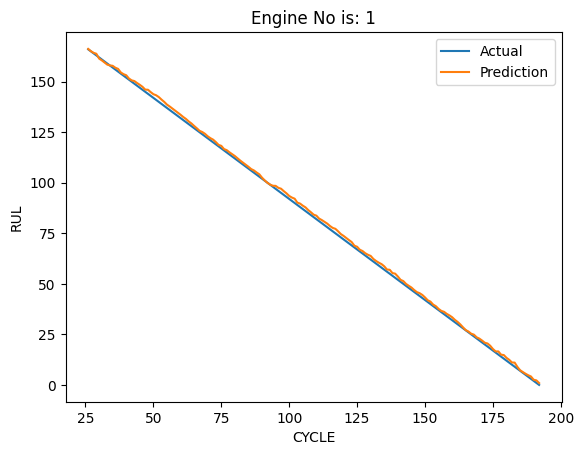



RMSE on This set: 1.2928838359450436


In [ ]:
plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0],rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.title('Engine No is: {}'.format(engine_id))
plt.legend([ 'Actual','Prediction'], loc='upper right')
plt.show()
print('\n')
print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

Shape of df for engine 38:  (194, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.5168947860692104


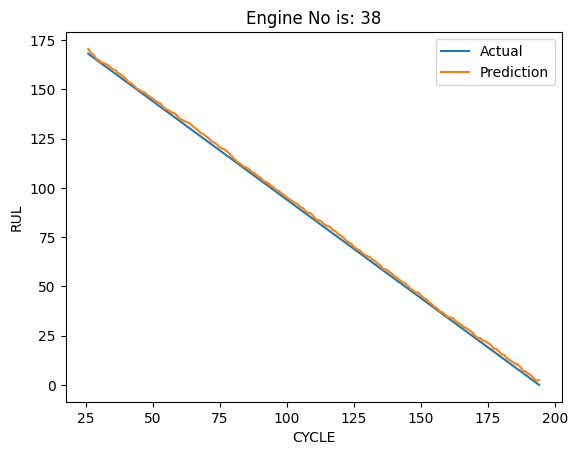



Shape of df for engine 30:  (194, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 1.2987211885423793


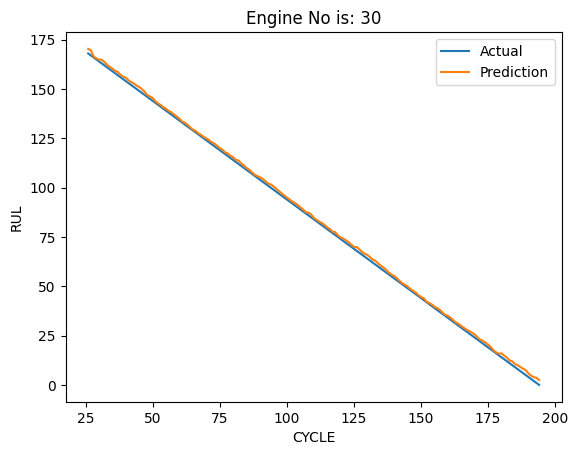



Shape of df for engine 17:  (276, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 1.547769571520046


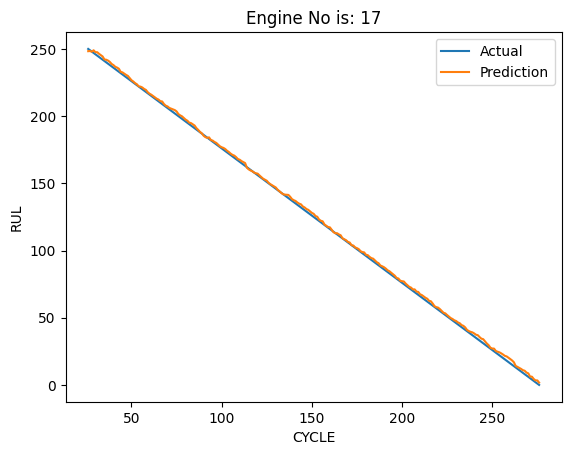



Shape of df for engine 37:  (170, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.3803941235688835


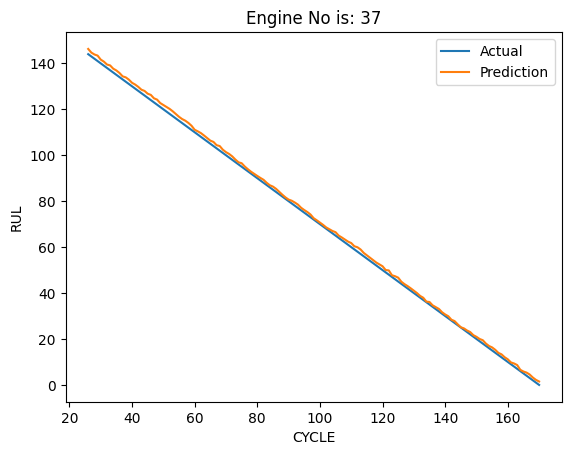



Shape of df for engine 11:  (240, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.5918631796002813


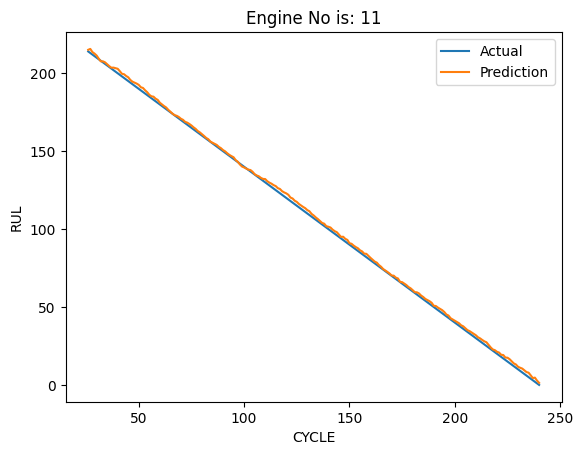



Shape of df for engine 3:  (179, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.7700099754495302


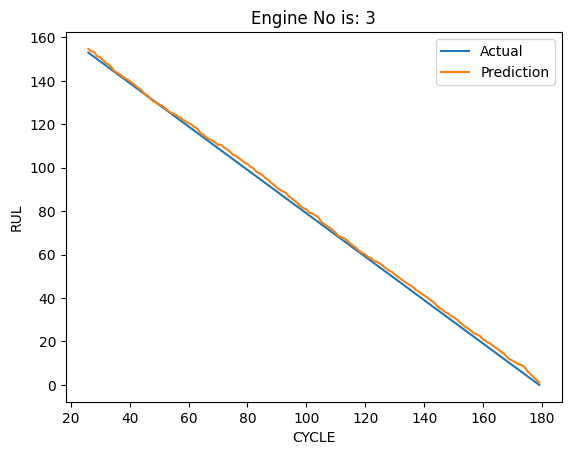



Shape of df for engine 15:  (207, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.2417731125889953


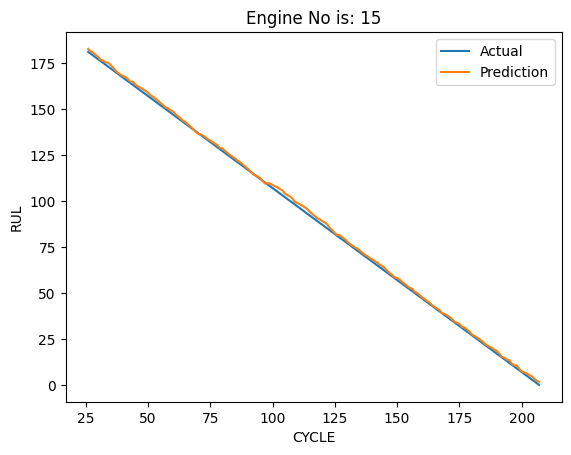



Shape of df for engine 15:  (207, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 1.2417731125889953


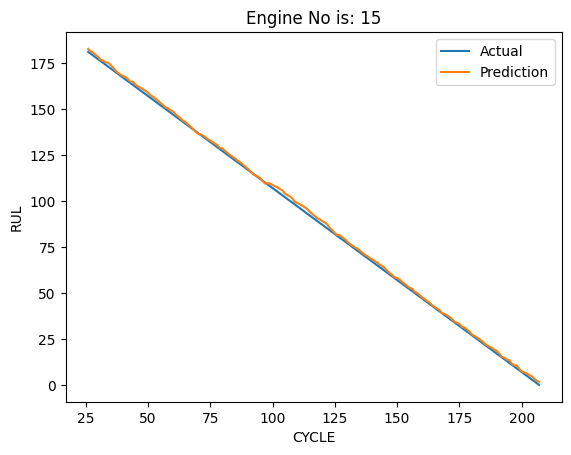



Shape of df for engine 31:  (234, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 1.6174285044461443


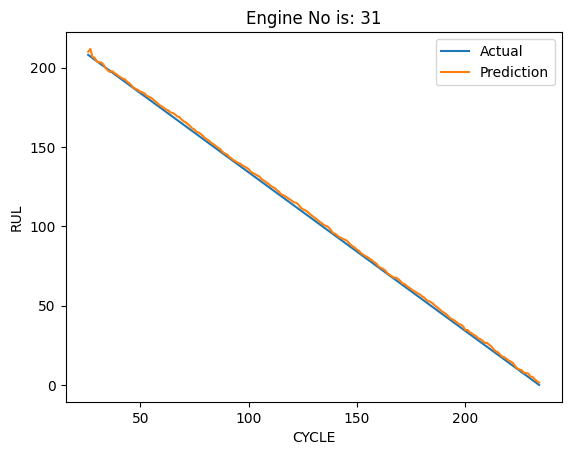



Shape of df for engine 37:  (170, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.3803941235688835


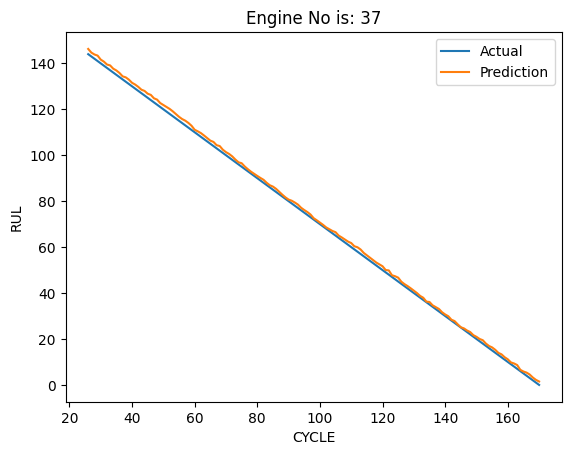



Shape of df for engine 45:  (158, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.8379573859293357


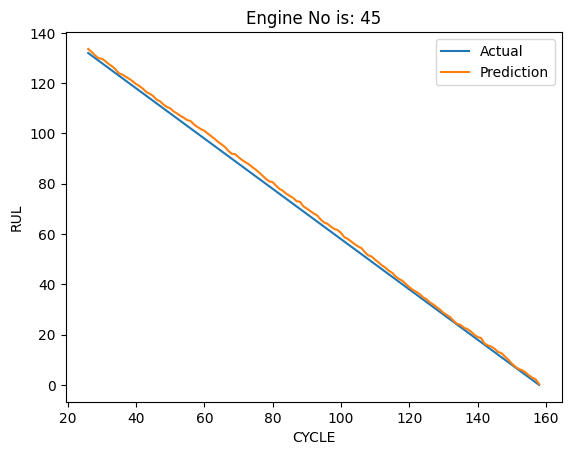



Shape of df for engine 4:  (189, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 1.6217224350759754


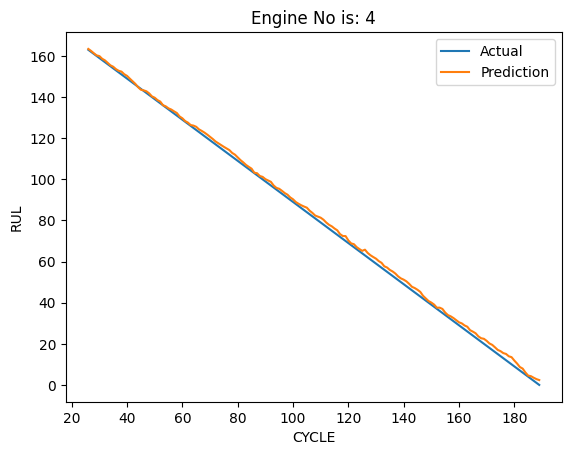



Shape of df for engine 16:  (209, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.5005877939706302


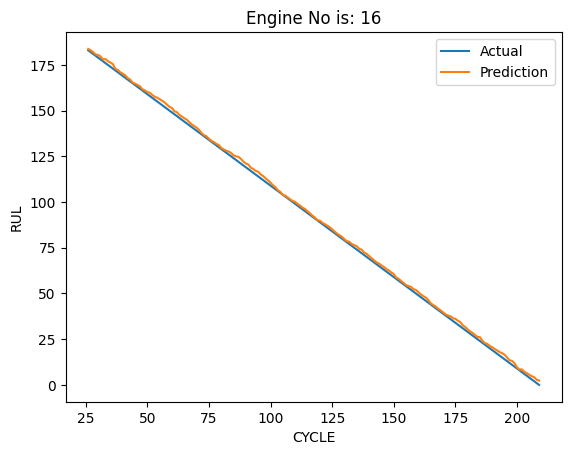



Shape of df for engine 49:  (215, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 1.2837702409160965


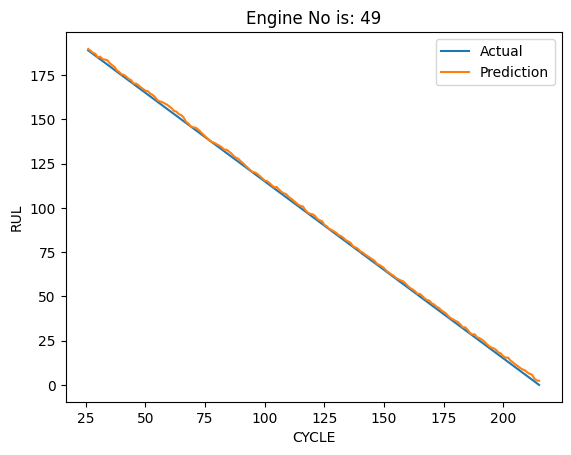



Shape of df for engine 44:  (192, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 1.285890617281684


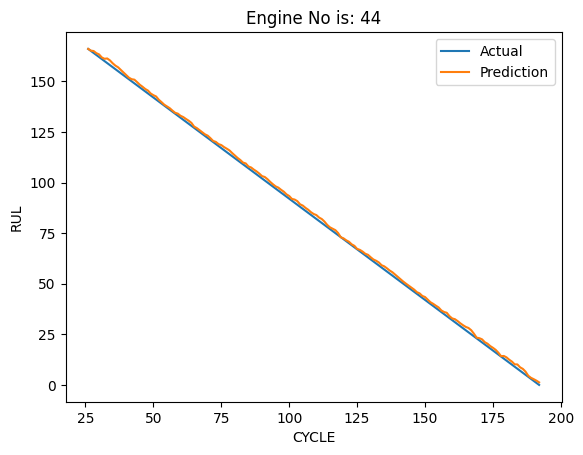



Shape of df for engine 43:  (207, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.5652823171005783


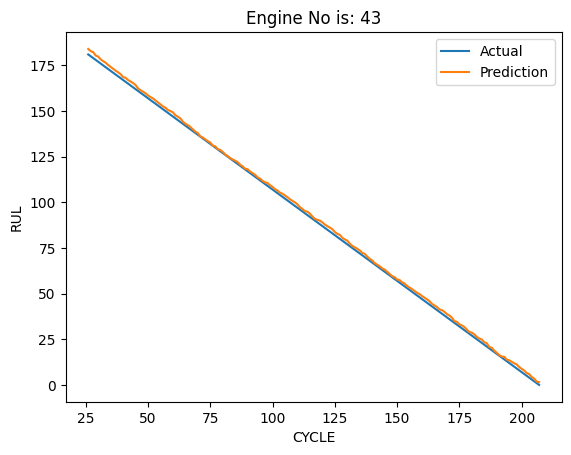



Shape of df for engine 24:  (147, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RMSE on This set: 1.6607957856948456


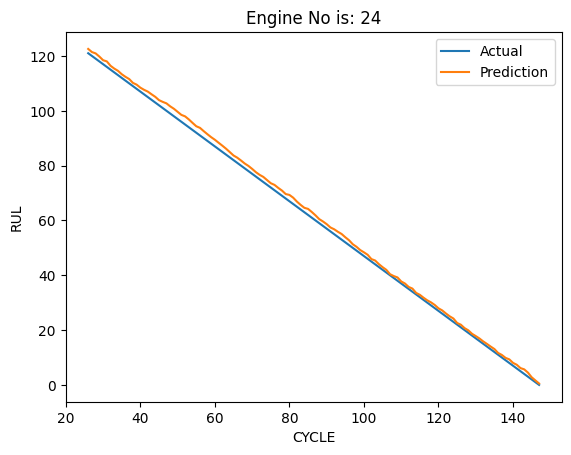



Shape of df for engine 24:  (147, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RMSE on This set: 1.6607957856948456


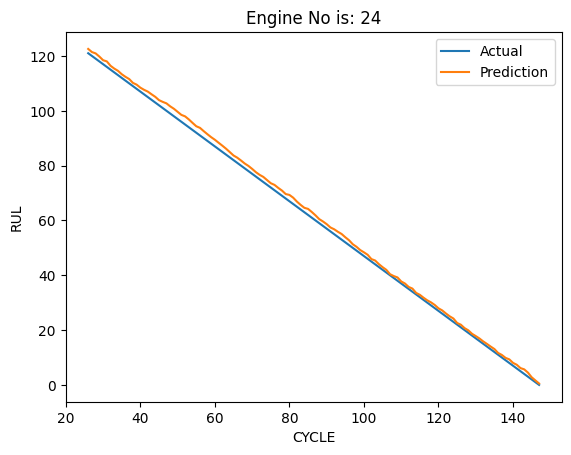



Shape of df for engine 19:  (158, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.7680015537603289


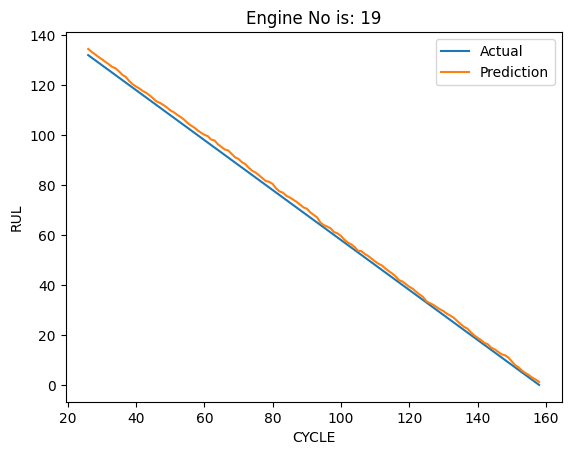



Shape of df for engine 42:  (196, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 1.6467618454695971


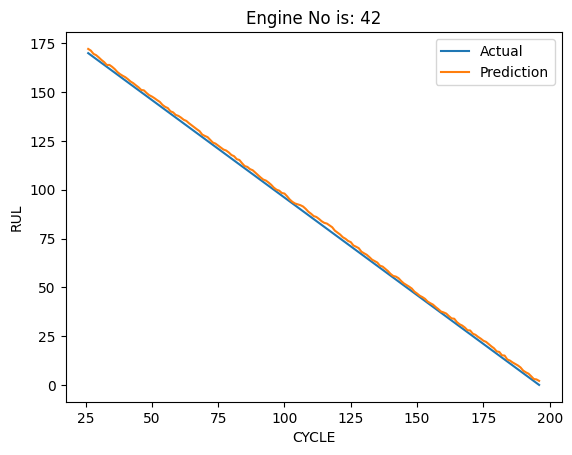



Shape of df for engine 22:  (202, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.1996416018791296


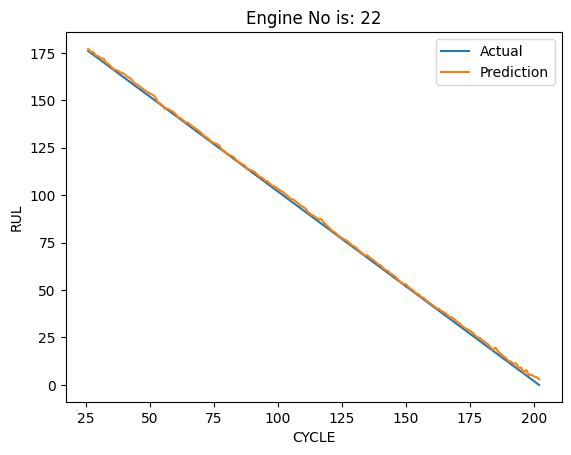



Shape of df for engine 32:  (191, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 1.2081661414402178


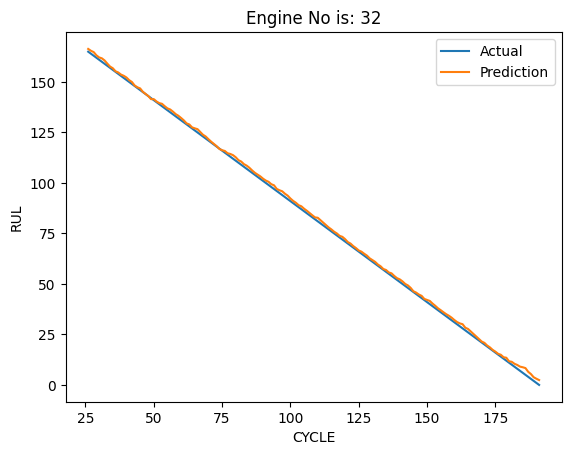



Shape of df for engine 2:  (287, 14)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 1.4167530559756216


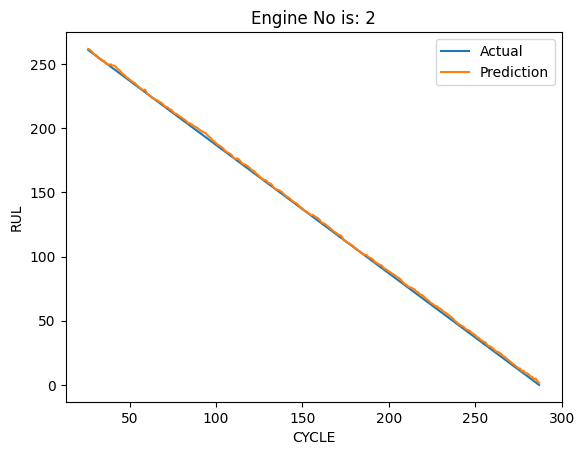



Shape of df for engine 7:  (259, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 1.4410282297720205


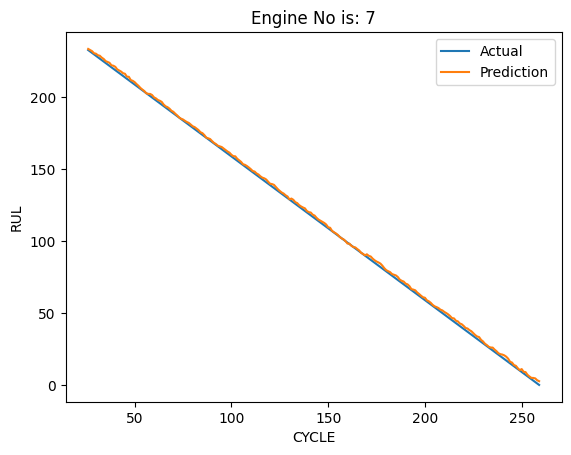



Shape of df for engine 41:  (216, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 1.5795793421688715


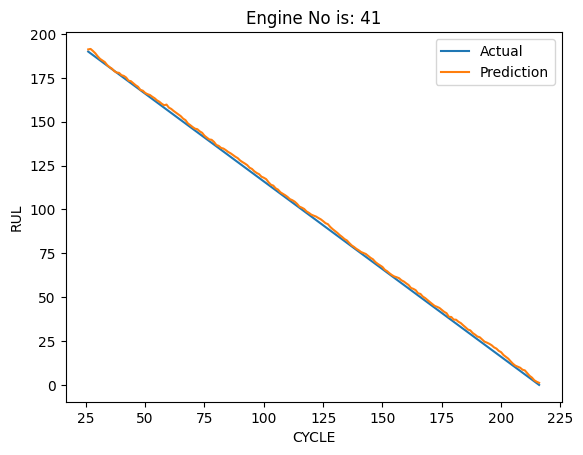

In [ ]:
Train_no=1

m = np.random.randint(low=1,high=50,size=25) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_id))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

# Predict on Test data

Shape of df for engine 55:  (193, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 1.3840468341823904


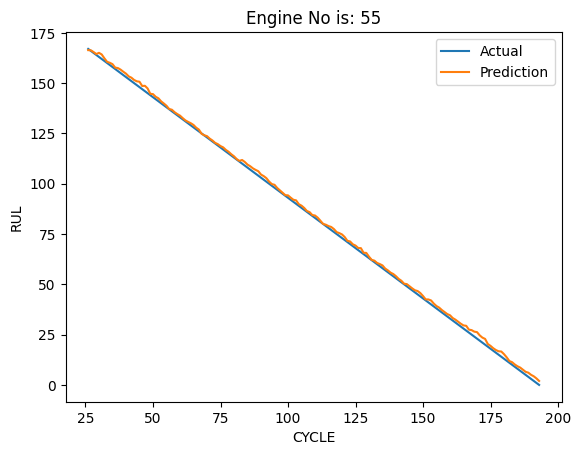



Shape of df for engine 59:  (231, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.3325449361279007


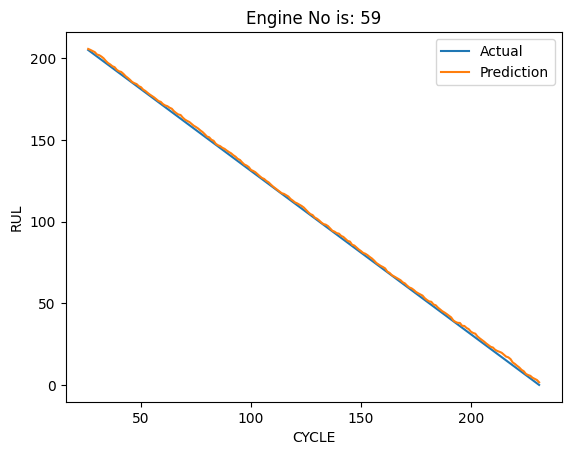



Shape of df for engine 70:  (137, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RMSE on This set: 1.4515682256526943


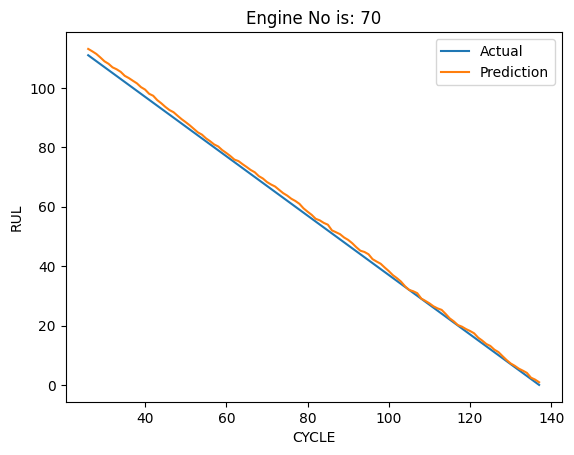



Shape of df for engine 91:  (135, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RMSE on This set: 1.7811075339336464


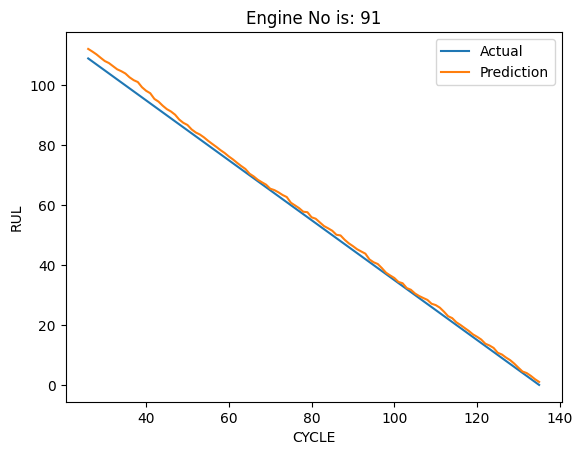



Shape of df for engine 63:  (174, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 1.7967317363412605


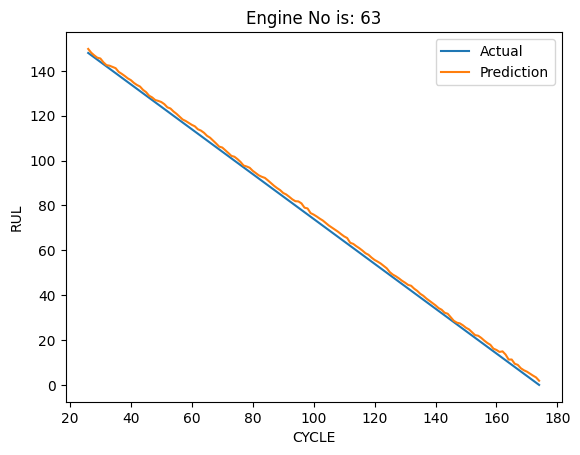



Shape of df for engine 98:  (156, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 1.71712370033609


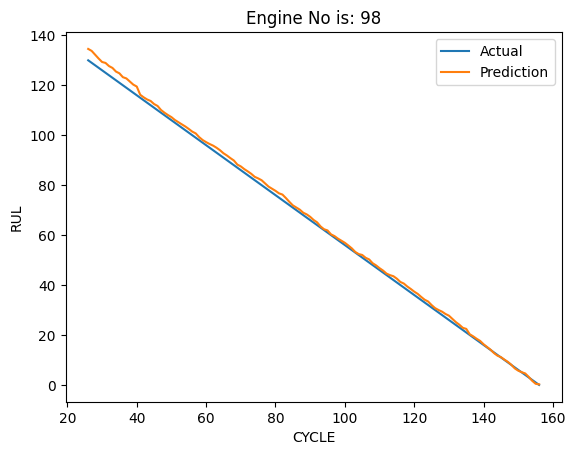



Shape of df for engine 77:  (154, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
RMSE on This set: 1.3594079701493516


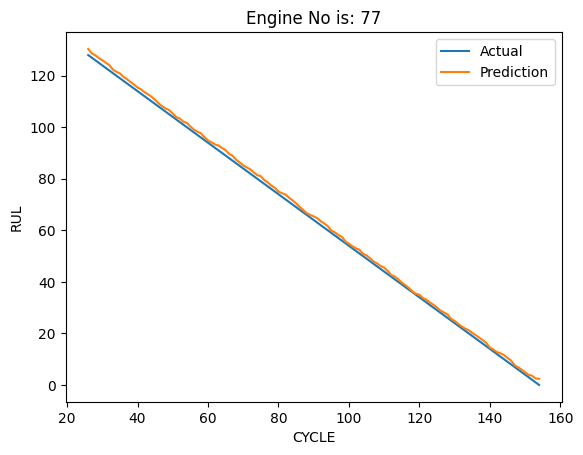



Shape of df for engine 86:  (278, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 1.5395083864634507


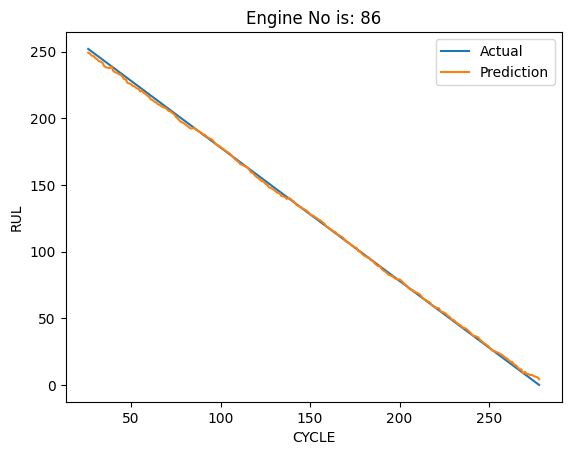



Shape of df for engine 95:  (283, 14)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE on This set: 1.2514904610510185


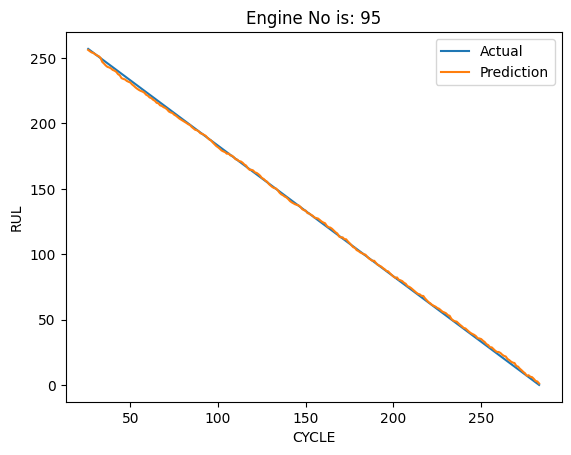



Shape of df for engine 94:  (258, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
RMSE on This set: 2.182904673019258


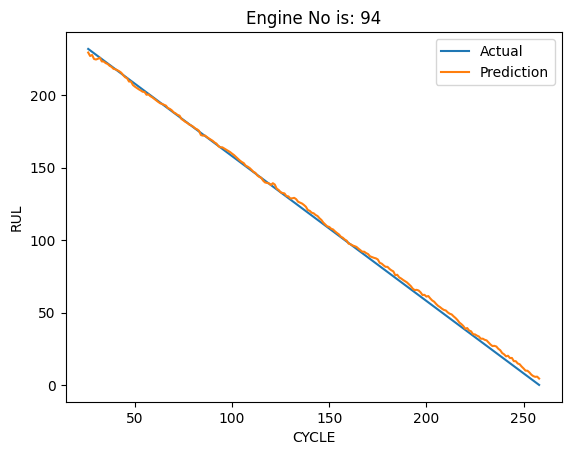



Shape of df for engine 77:  (154, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.3594079701493516


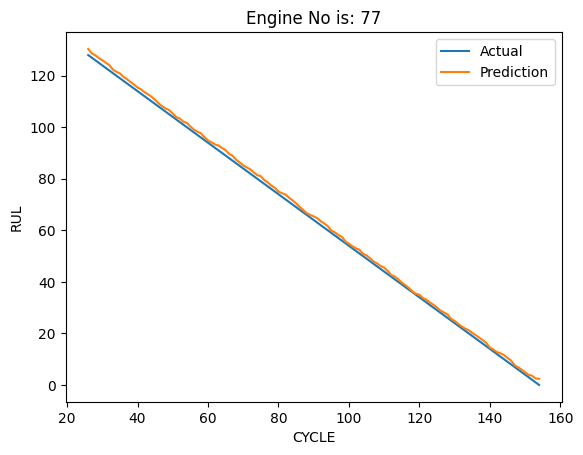



Shape of df for engine 58:  (147, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
RMSE on This set: 1.6182847000129454


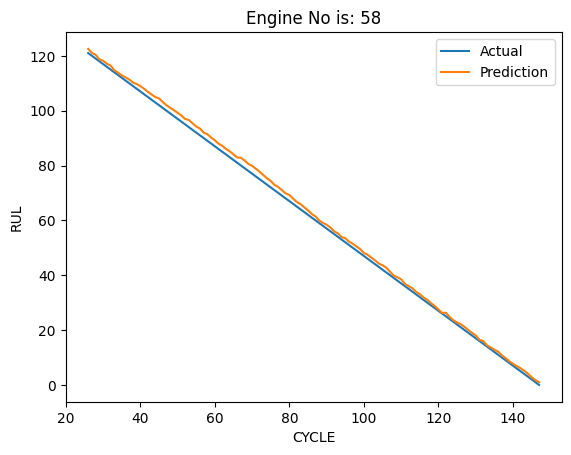



Shape of df for engine 68:  (199, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.3423659056981865


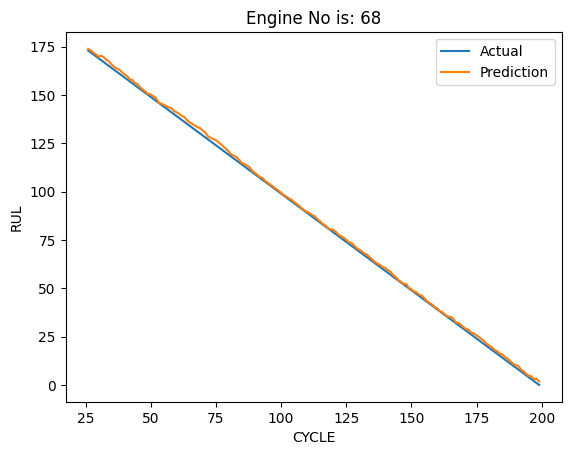



Shape of df for engine 85:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
RMSE on This set: 1.5529123593543395


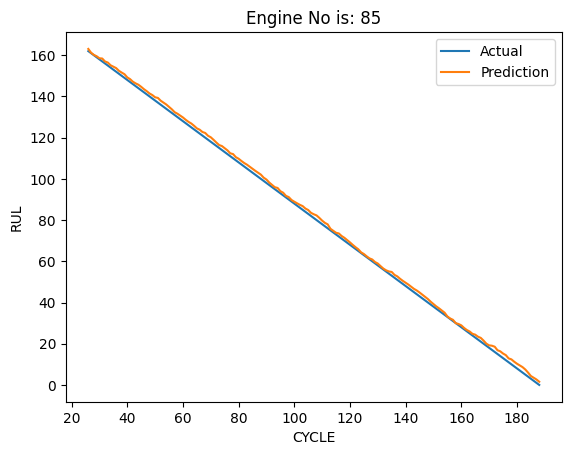



Shape of df for engine 67:  (313, 14)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 1.4969479971278004


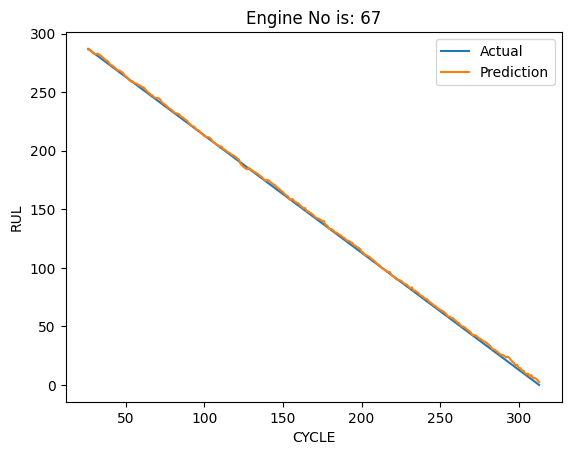



Shape of df for engine 77:  (154, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
RMSE on This set: 1.3594079701493516


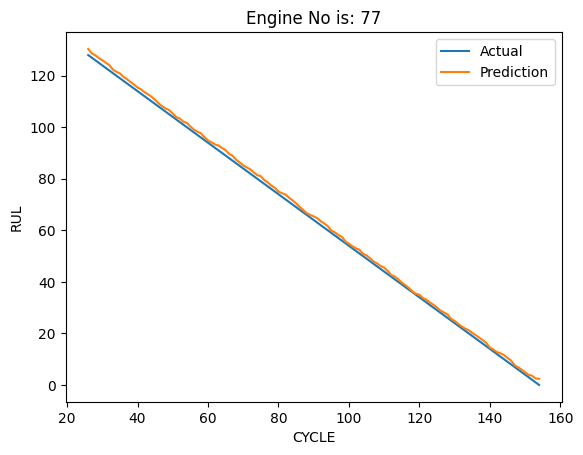



Shape of df for engine 73:  (213, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.4289188261969972


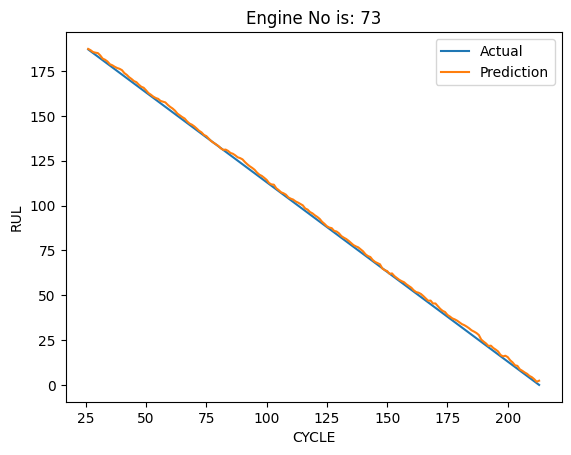



Shape of df for engine 99:  (185, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 2.248360446536662


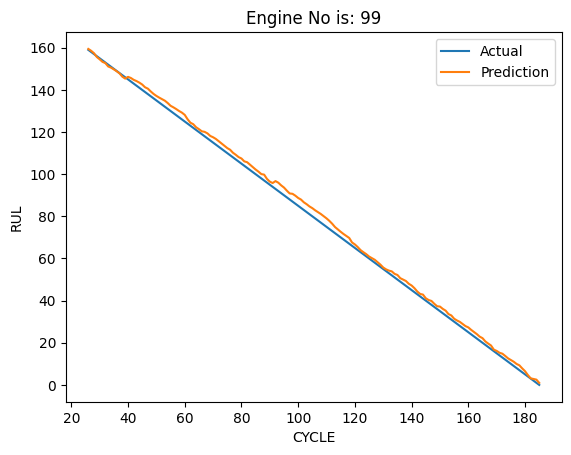



Shape of df for engine 88:  (213, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.1683643794688903


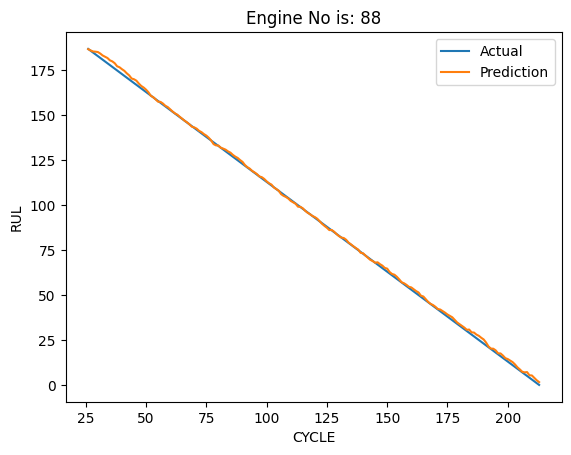



Shape of df for engine 79:  (199, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.3699091892402442


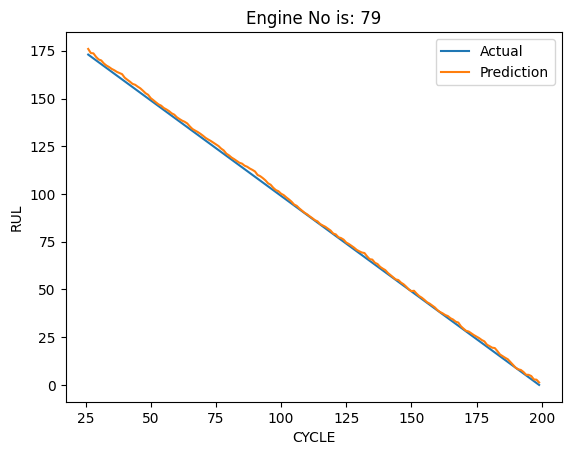



Shape of df for engine 76:  (210, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
RMSE on This set: 1.2447816197775319


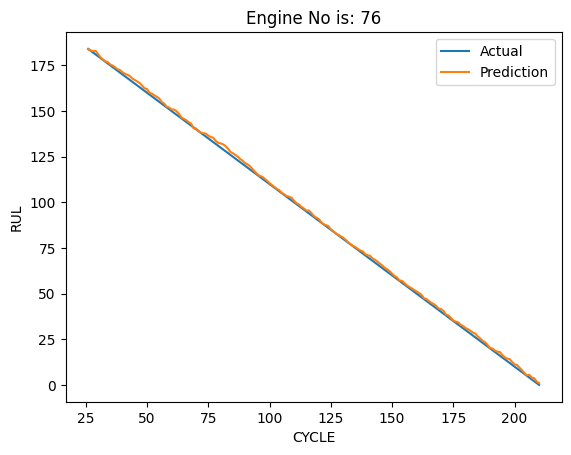



Shape of df for engine 66:  (202, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE on This set: 1.3293964141702432


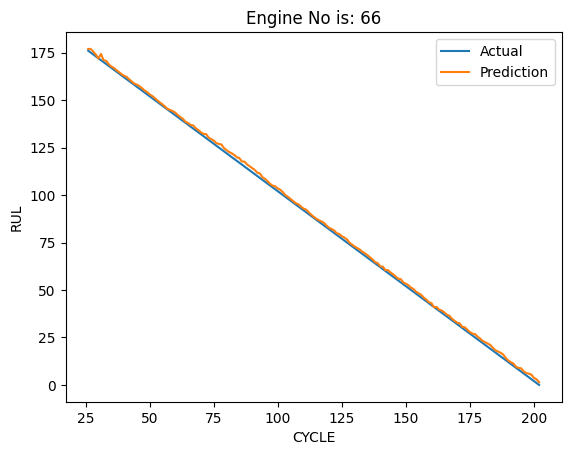



Shape of df for engine 54:  (257, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE on This set: 1.5177725997376523


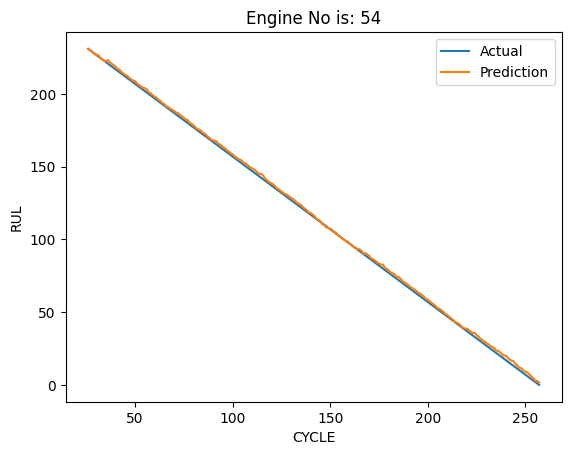



Shape of df for engine 98:  (156, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE on This set: 1.71712370033609


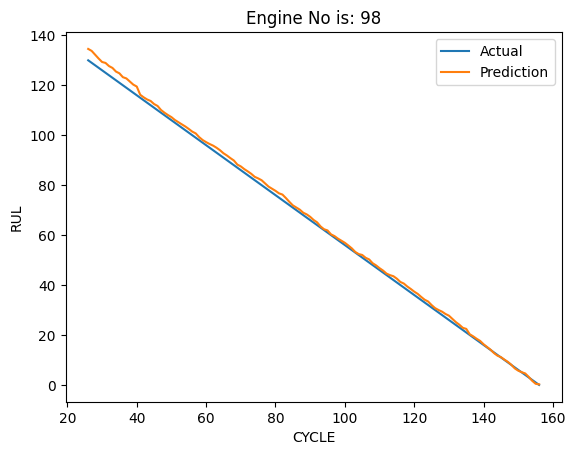



Shape of df for engine 90:  (154, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
RMSE on This set: 2.2977975532115664


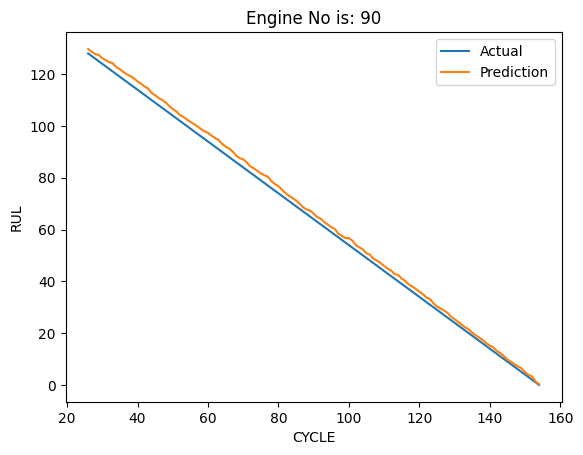

In [ ]:
Train_no=1

n = np.random.randint(low=51,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_id))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

Shape of df for engine 5:  (269, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


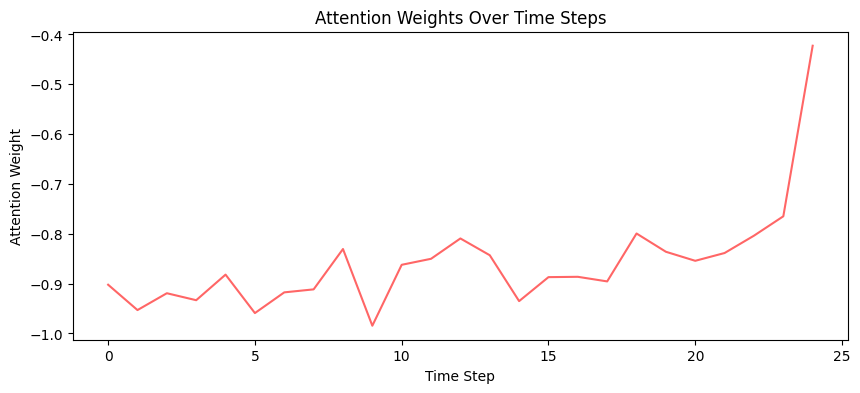

In [ ]:
# Extract attention weights for visualization
attention_model = Model(inputs=model.input, outputs=model.layers[3].output)  # Layer 3 is the attention layer

# For sample engine 5
X_sample, _, _, _ = Data_format_conversion(1, 5)
attention_weights = attention_model.predict(X_sample)

# Plot
plt.figure(figsize=(10,4))
plt.plot(attention_weights[0].squeeze(), 'r', alpha=0.6)
plt.title('Attention Weights Over Time Steps')
plt.xlabel('Time Step')
plt.ylabel('Attention Weight')
plt.show()

In [ ]:
# save model and architecture to single file
model.save("model_1.h5")
print("Saved model to disk")

Saved model to disk
